In [31]:
import numpy as np
import math
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [3]:
def factorial(n):
    r = 1
    for i in range(1,n+1):
        r *= i
    return r

In [4]:
factorial(5)

120

In [5]:
def fact(n):
    if (n==1):
        return 1
    else:
        return n*fact(n-1)

In [6]:
np.power(0.0003j+1.1,2+0.000003123j)

(1.2099999087729054+0.00066036016051802024j)

In [7]:
np.logspace(1,8,num=5,base=2)

array([   2.        ,    6.72717132,   22.627417  ,   76.10925536,  256.        ])

In [9]:
def get_runtime(visits, sky_area, distance, baseline):
    # visits - number of images, sky_area - 1 for now, distance - AU, baseline - hours
    # A. if object even moves far enough for shifting to be required
    # B. object moves enough that trajectory becomes significantly non-linear
    # C. If GPU is using maximum memory
    #earth_vel = 0.00074 # AU/h
    hours_per_year = 8760
    circ = 2*math.pi*distance # circumference
    period = distance**1.5
    object_moved = (baseline/hours_per_year)*(circ/period)
    ang_moved = math.atan(object_moved/distance)
    sq_arc_per_sq_deg = 3600*3600
    pixel_width = 0.25 # decam pixel size of 0.25 arcsecond
    pixels_in_area = sky_area*(sq_arc_per_sq_deg)*((1/0.25)**2)
    pixels_per_radian = 206265/pixel_width
    pixels_moved = pixels_per_radian*ang_moved
    trajectories_per_second = 1400000000/(visits/30) # this number is based on benchmarks
    total_pixel_coverage = (pixels_moved)**2 # number of trajectories to search
    total_trajectories = total_pixel_coverage*pixels_in_area
    
    return total_trajectories/trajectories_per_second#(img_count*sky_area*(baseline**2))/distance

In [11]:
# Decam field is 3 square degrees, split up into 62 ccds
sky_a = 3/62
get_runtime(30, sky_a, 40, 24*3)

203.29846982900094

In [12]:
def plot_compute_time(visits, sky_area, resolution):
    img = np.zeros([resolution,resolution])
    x_i = 0
    y_i = 0
    for y in np.logspace(1,12,num=resolution,base=2):
        for x in np.logspace(1,12,num=resolution,base=2):
            bl = x
            ds = y
            img[x_i][y_i] = get_runtime(visits, sky_area, ds, bl)
            x_i += 1
        y_i += 1
        x_i = 0
    return img

In [28]:
k = []
grid_size = 6
resolution = 10
x_t = 0
y_t = 0
for visits in np.logspace(3,8,num=grid_size,base=2):
    k.append([])
    for area in np.logspace(1,6,num=grid_size,base=2):
        k[y_t].append(plot_compute_time(visits,area,resolution))
        x_t += 1
    y_t += 1
    x_t = 0
#k = plot_compute_time(15,3/62,10)

In [29]:
k[3][4][5][6]

2016.9439874530353

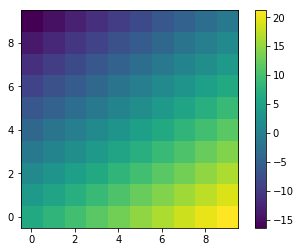

In [15]:
# plot notes: assumes pixel size similiar to decam
plt.imshow(np.log(k.T), origin='lower')
plt.colorbar()

In [120]:
get_runtime(5,5,4,2)

25.0

In [ ]:
plt.xscale('log')

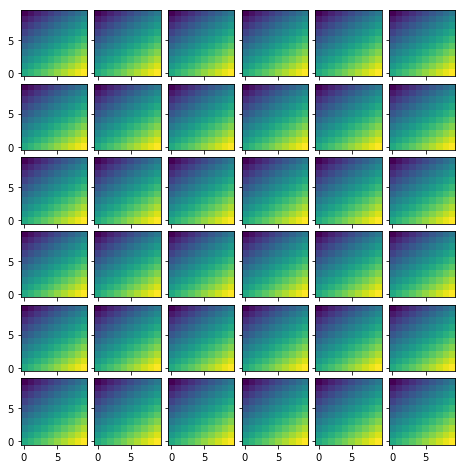

In [44]:

fig = plt.figure(4, (8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(grid_size, grid_size),  
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for i in range(grid_size*grid_size):
    grid[i].imshow(np.log(k[i//grid_size][i%grid_size]).T, origin='lower')  # The AxesGrid object work as a list of axes.
    
#plt.colorbar()
plt.show()